In [1]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn import set_config

In [56]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
set_config(transform_output="pandas")

In [8]:
sfr_df = pd.read_csv("Metro_new_con_median_sale_price_per_sqft_uc_sfr_month.csv")

In [14]:
sfr_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30
0,102001,0,United States,country,NaN,137.134466,137.711864,139.982526,140.000000,143.391393,...,201.233397,204.499531,206.557377,206.983871,206.603044,206.297742,208.175743,207.971014,212.134526,212.892847
1,394913,1,"New York, NY",msa,NY,230.173491,221.022090,234.962988,239.900000,230.477223,...,388.665917,429.570430,442.858120,453.499079,452.380952,422.413793,510.259932,468.965517,412.901111,437.628676
2,753899,2,"Los Angeles, CA",msa,CA,407.229394,428.265525,446.111916,451.886320,500.000000,...,578.241604,665.270214,565.924142,575.528893,593.113274,664.002515,589.622642,667.945205,674.882629,629.064766
3,394463,3,"Chicago, IL",msa,IL,146.153846,147.157191,144.845616,151.720769,151.581157,...,204.463498,206.517115,218.511463,216.585300,222.495000,223.214286,214.524622,216.204082,216.203386,209.856651
4,394514,4,"Dallas, TX",msa,TX,130.773618,131.131294,132.550472,131.787037,136.100888,...,189.637109,194.763581,196.296296,194.124938,193.627978,194.373070,193.806890,194.688853,197.264131,201.586120


In [83]:
sfr_df_fl = sfr_df[sfr_df["StateName"] == "FL"]
sfr_df_fl['RegionName'] = sfr_df_fl['RegionName'].str.replace(r', FL','', regex=True)
sfr_df_fl["RegionName"].unique()


C:\Users\jcp_2\AppData\Local\Temp\ipykernel_9728\2970357458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sfr_df_fl['RegionName'] = sfr_df_fl['RegionName'].str.replace(r', FL','', regex=True)


array(['Miami', 'Tampa', 'Orlando', 'Jacksonville', 'North Port',
       'Cape Coral', 'Lakeland', 'Deltona', 'Palm Bay', 'Pensacola',
       'Port St. Lucie', 'Tallahassee', 'Naples', 'Ocala', 'Crestview',
       'Punta Gorda', 'Panama City', 'Sebastian', 'Homosassa Springs'],
      dtype=object)

In [35]:
sfr_df_fl.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30
8,394856,8,Miami,msa,FL,184.740022,188.463451,187.987704,193.965517,191.860578,...,360.948545,402.350848,404.142460,368.965517,369.614512,354.281111,365.714286,395.575060,449.000000,406.607062
18,395148,18,Tampa,msa,FL,126.516710,124.263858,128.561633,130.514706,128.676274,...,182.319534,190.450644,191.880318,195.535231,195.940231,196.078431,194.290207,201.248245,202.057937,209.946906
22,394943,22,Orlando,msa,FL,136.620135,141.563981,141.270809,142.202236,140.727592,...,216.302922,225.108696,230.848980,225.924508,224.074074,228.001083,229.026846,226.788699,229.262193,233.391841
37,394714,40,Jacksonville,msa,FL,129.951372,128.342439,133.666357,132.268514,135.840368,...,200.806206,209.267564,213.905395,215.273140,219.909373,213.574293,208.950263,209.047936,208.692053,205.955335
58,753906,73,North Port,msa,FL,167.818906,158.786168,158.653846,169.613621,162.775616,...,243.125000,230.993465,229.634015,228.231905,219.534050,224.837317,218.559219,226.312816,215.534554,220.830299


In [53]:
sfr_df_fl_or = sfr_df_fl[sfr_df_fl["RegionName"] == "Orlando"]
sfr_df_fl_or

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30
22,394943,22,Orlando,msa,FL,136.620135,141.563981,141.270809,142.202236,140.727592,...,216.302922,225.108696,230.84898,225.924508,224.074074,228.001083,229.026846,226.788699,229.262193,233.391841


In [54]:
sfr_df_fl_or = sfr_df_fl_or.drop(columns=['RegionType', 'RegionID'])
df_or = sfr_df_fl_or.melt(id_vars=["RegionName","StateName","SizeRank"],
                          var_name="Date",
                          value_name="Price__sqft"
                          )
df_or

,RegionName,StateName,SizeRank,Date,Price__sqft
0,Orlando,FL,22,2018-01-31,136.620135
1,Orlando,FL,22,2018-02-28,141.563981
2,Orlando,FL,22,2018-03-31,141.270809
3,Orlando,FL,22,2018-04-30,142.202236
4,Orlando,FL,22,2018-05-31,140.727592
...,...,...,...,...,...
78,Orlando,FL,22,2024-07-31,228.001083
79,Orlando,FL,22,2024-08-31,229.026846
80,Orlando,FL,22,2024-09-30,226.788699
81,Orlando,FL,22,2024-10-31,229.262193


In [82]:
df_or['Date'] = pd.to_datetime(df_or['Date'])
df_or.tail()

,RegionName,StateName,SizeRank,Date,Price__sqft
78,Orlando,FL,22,2024-07-31,228.001083
79,Orlando,FL,22,2024-08-31,229.026846
80,Orlando,FL,22,2024-09-30,226.788699
81,Orlando,FL,22,2024-10-31,229.262193
82,Orlando,FL,22,2024-11-30,233.391841


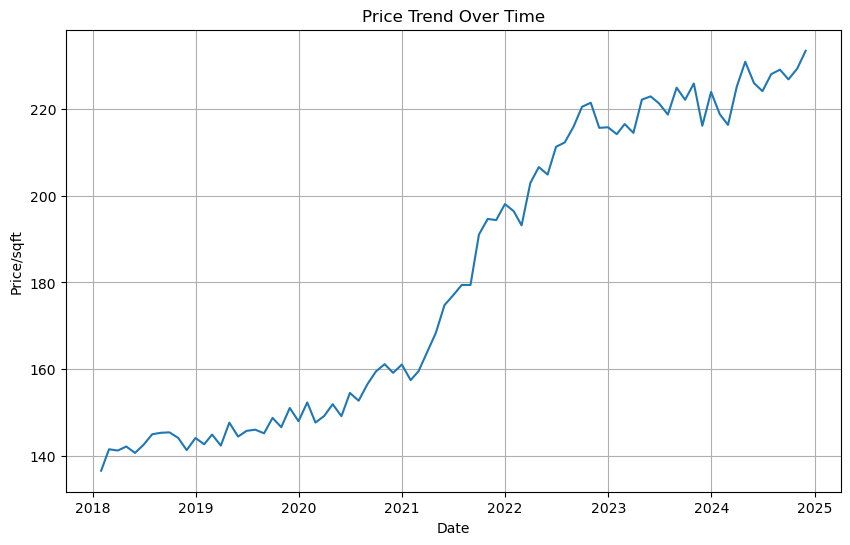

In [81]:
plt.figure(figsize=(10, 6))

plt.plot(df_or['Date'], df_or['Price__sqft'])


    # Plot the regression line
#plt.plot(X_feature, lm.predict(X_feature), color='red', label='Regression Line')

plt.xlabel("Date")
plt.ylabel("Price/sqft")
plt.title("Price Trend Over Time")
plt.grid(True)

C:\Users\jcp_2\AppData\Local\Temp\ipykernel_9728\3894873520.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


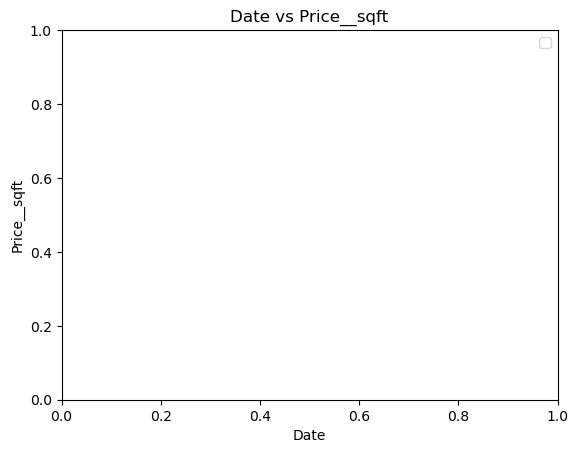

In [72]:
# Extract the feature column and target variable (mpg)
feature = df_or[["Date"]]
X_feature = df_or[["Date"]].values  # Extract as a 2D array
y = df_or['Price__sqft'].values  # Target variable (mpg)

    


    # Fit a linear regression model
lm = LinearRegression()
lm.fit(X_feature, y)

    # Plot the regression line
#plt.plot(X_feature, lm.predict(X_feature), color='red', label='Regression Line')

    # Add labels and title
plt.xlabel("Date")
plt.ylabel('Price__sqft')
plt.title(f'Date vs Price__sqft')

    # Add a legend
plt.legend()

    # Show the plot
plt.show()